In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
strg = "/mnt/research-projects/s/screberg/longterm_images/semifield-cutouts"
data = Path(strg).glob("*")
csvs = []
for a in data:
    csv = list(a.glob("*.csv"))
    if len(csv) > 0:
        csvs.append(csv[0])
df = pd.concat([pd.read_csv(x, low_memory=False) for x in csvs])
df["state_id"] = df.batch_id.str.split("_", expand=False).str[0]
df["date"] = df.batch_id.str.split("_", expand=False).str[1]
df["common_name"] = np.where(df.common_name == "Common lambsquarters", "Lambsquarter", df.common_name)


In [3]:
df['dt'] = pd.to_datetime(df['date'])
df["dt"]


0      2022-06-21
1      2022-06-21
2      2022-06-21
3      2022-06-21
4      2022-06-21
          ...    
5281   2022-09-23
5282   2022-09-23
5283   2022-09-23
5284   2022-09-23
5285   2022-09-23
Name: dt, Length: 237398, dtype: datetime64[ns]

# Total Number of batches

/home/mkutuga/anaconda3/envs/semif_gpu/lib/python3.9/site-packages/seaborn/categorical.py:3202: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


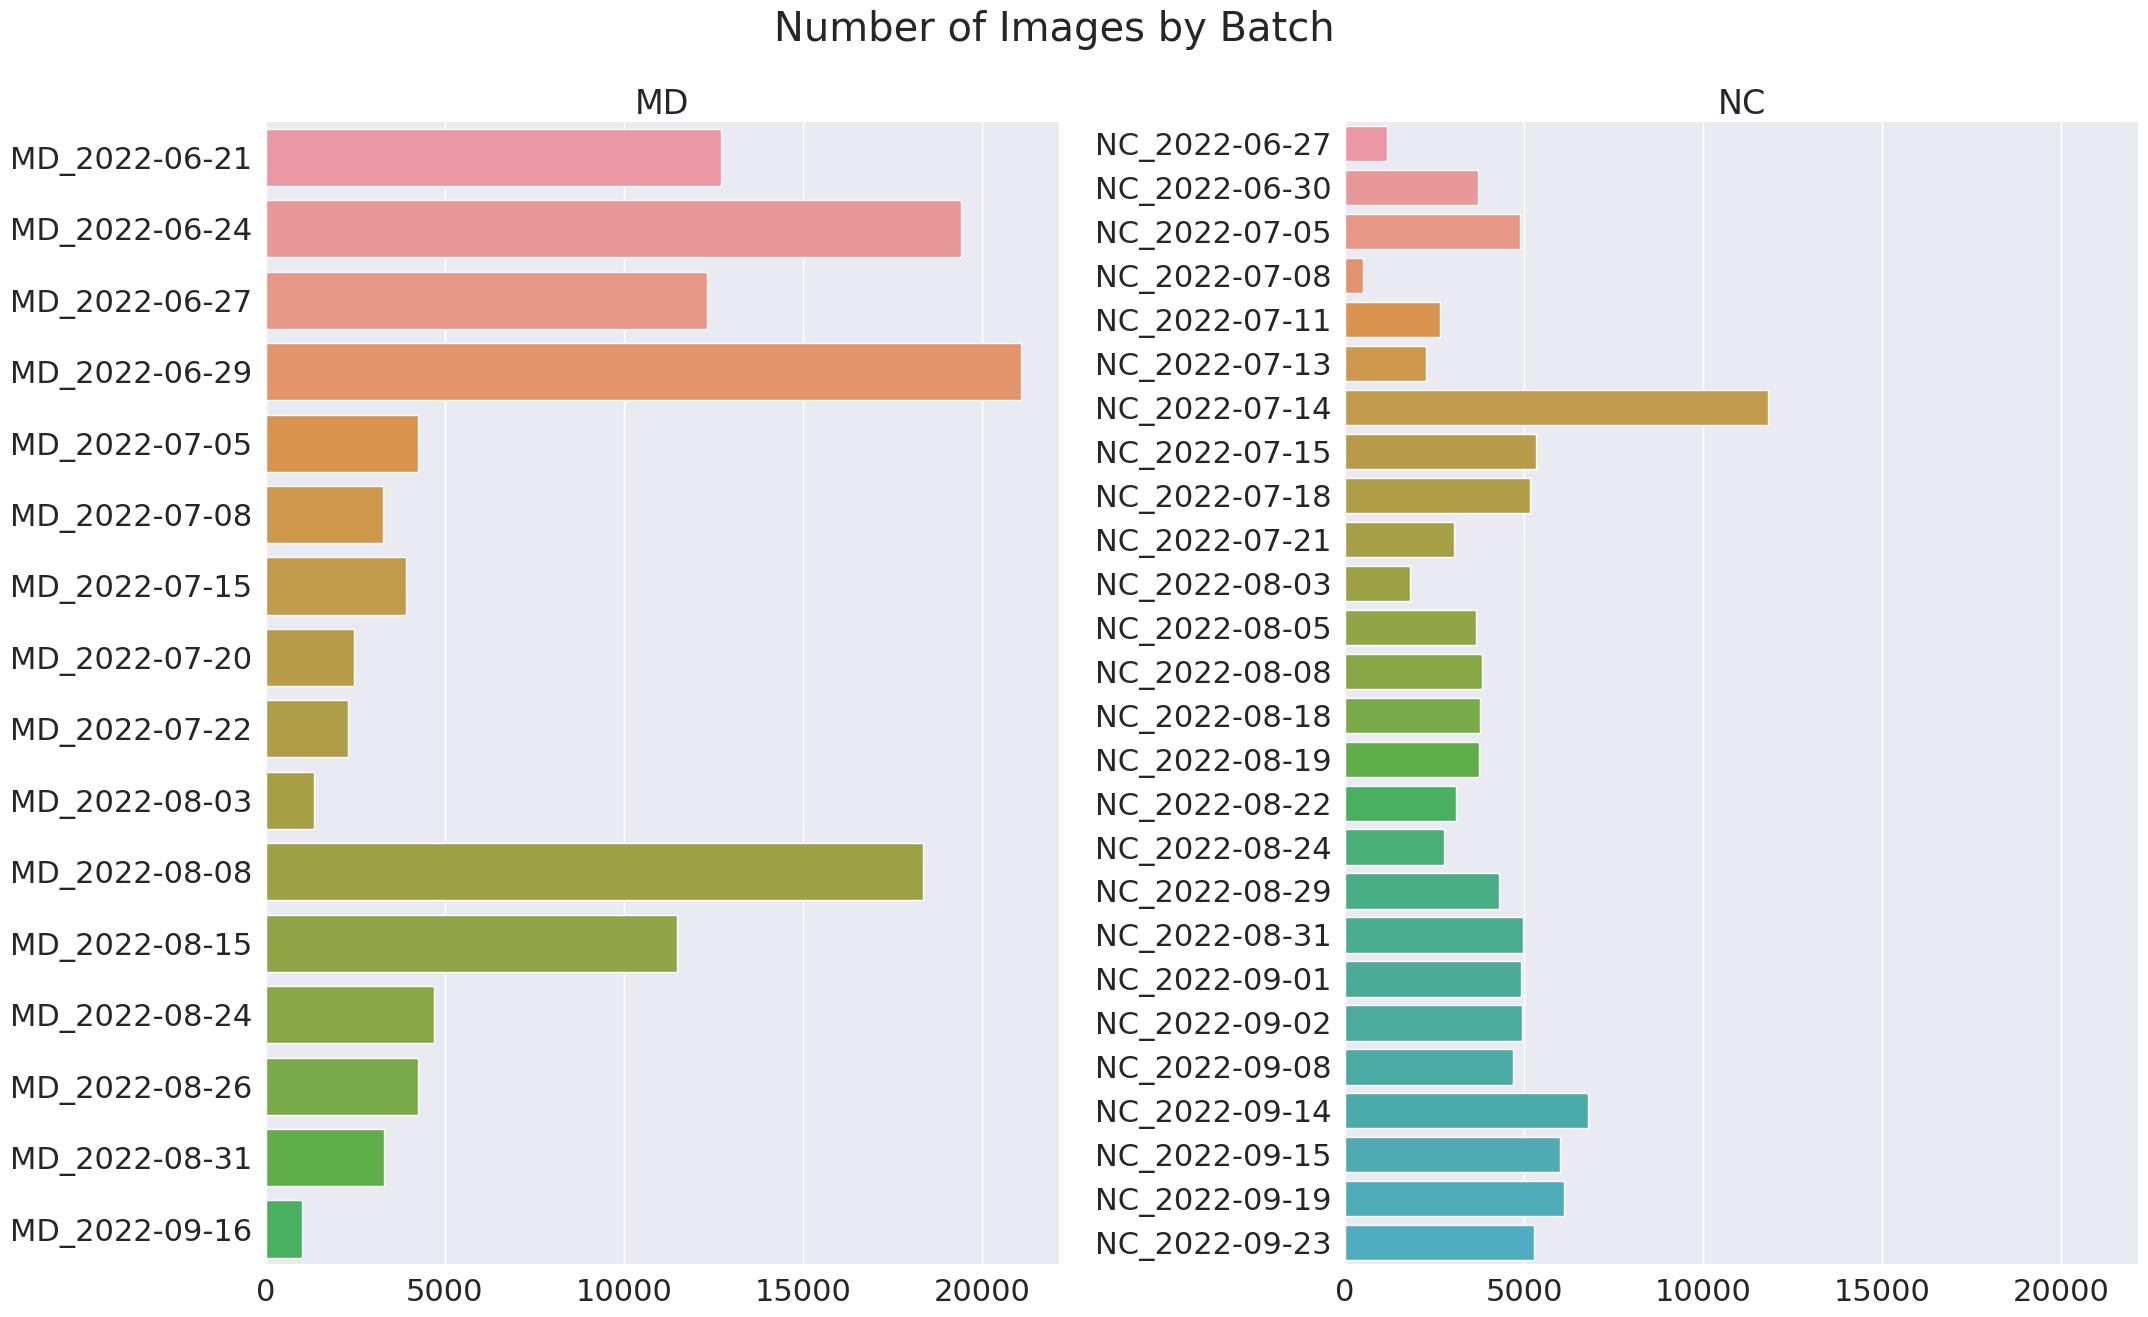

In [66]:
# plt.style.use('ggplot')
# sns.set_context("poster")
sns.set(font_scale=2)

g = sns.catplot(
    data=df,
    y="batch_id",
    col="state_id",
    sharey=False,
    kind="count",
    aspect=.8,
    height=14
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Images by Batch')
g.savefig("../assets/Images_by_batch_summer_weeds_2022.png", dpi=300)

# Number of images per species

/home/mkutuga/anaconda3/envs/semif_gpu/lib/python3.9/site-packages/seaborn/categorical.py:3202: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


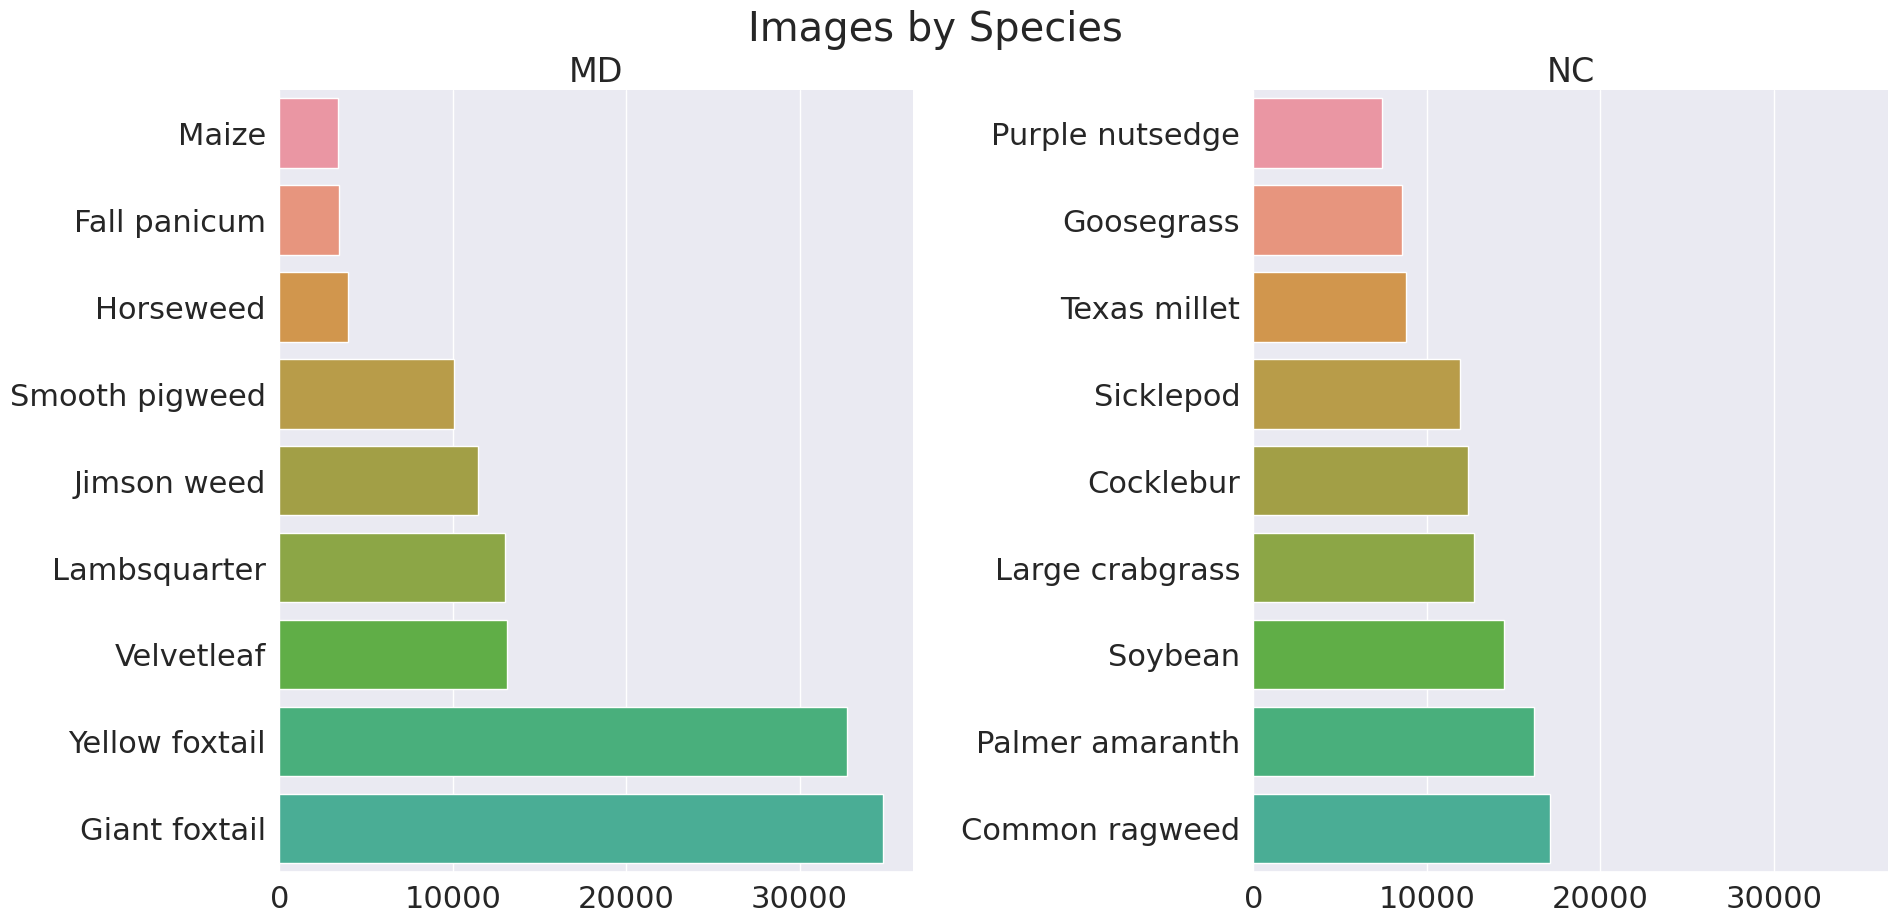

In [72]:

sns.set(font_scale=2)
sdf = df.groupby(["common_name", "state_id"]).image_id.count().reset_index().sort_values("image_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]

g = sns.catplot(
    data=sdf,
    x="image_id",
    y="common_name",
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    height=10
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Images by Species')
g.savefig("../assets/Images_by_species_summer_weeds_2022.png", dpi=300)


## Number of Cutout sub-images by batch

Text(0.5, 0.98, 'Number of Cutouts (sub-images) by Batch')

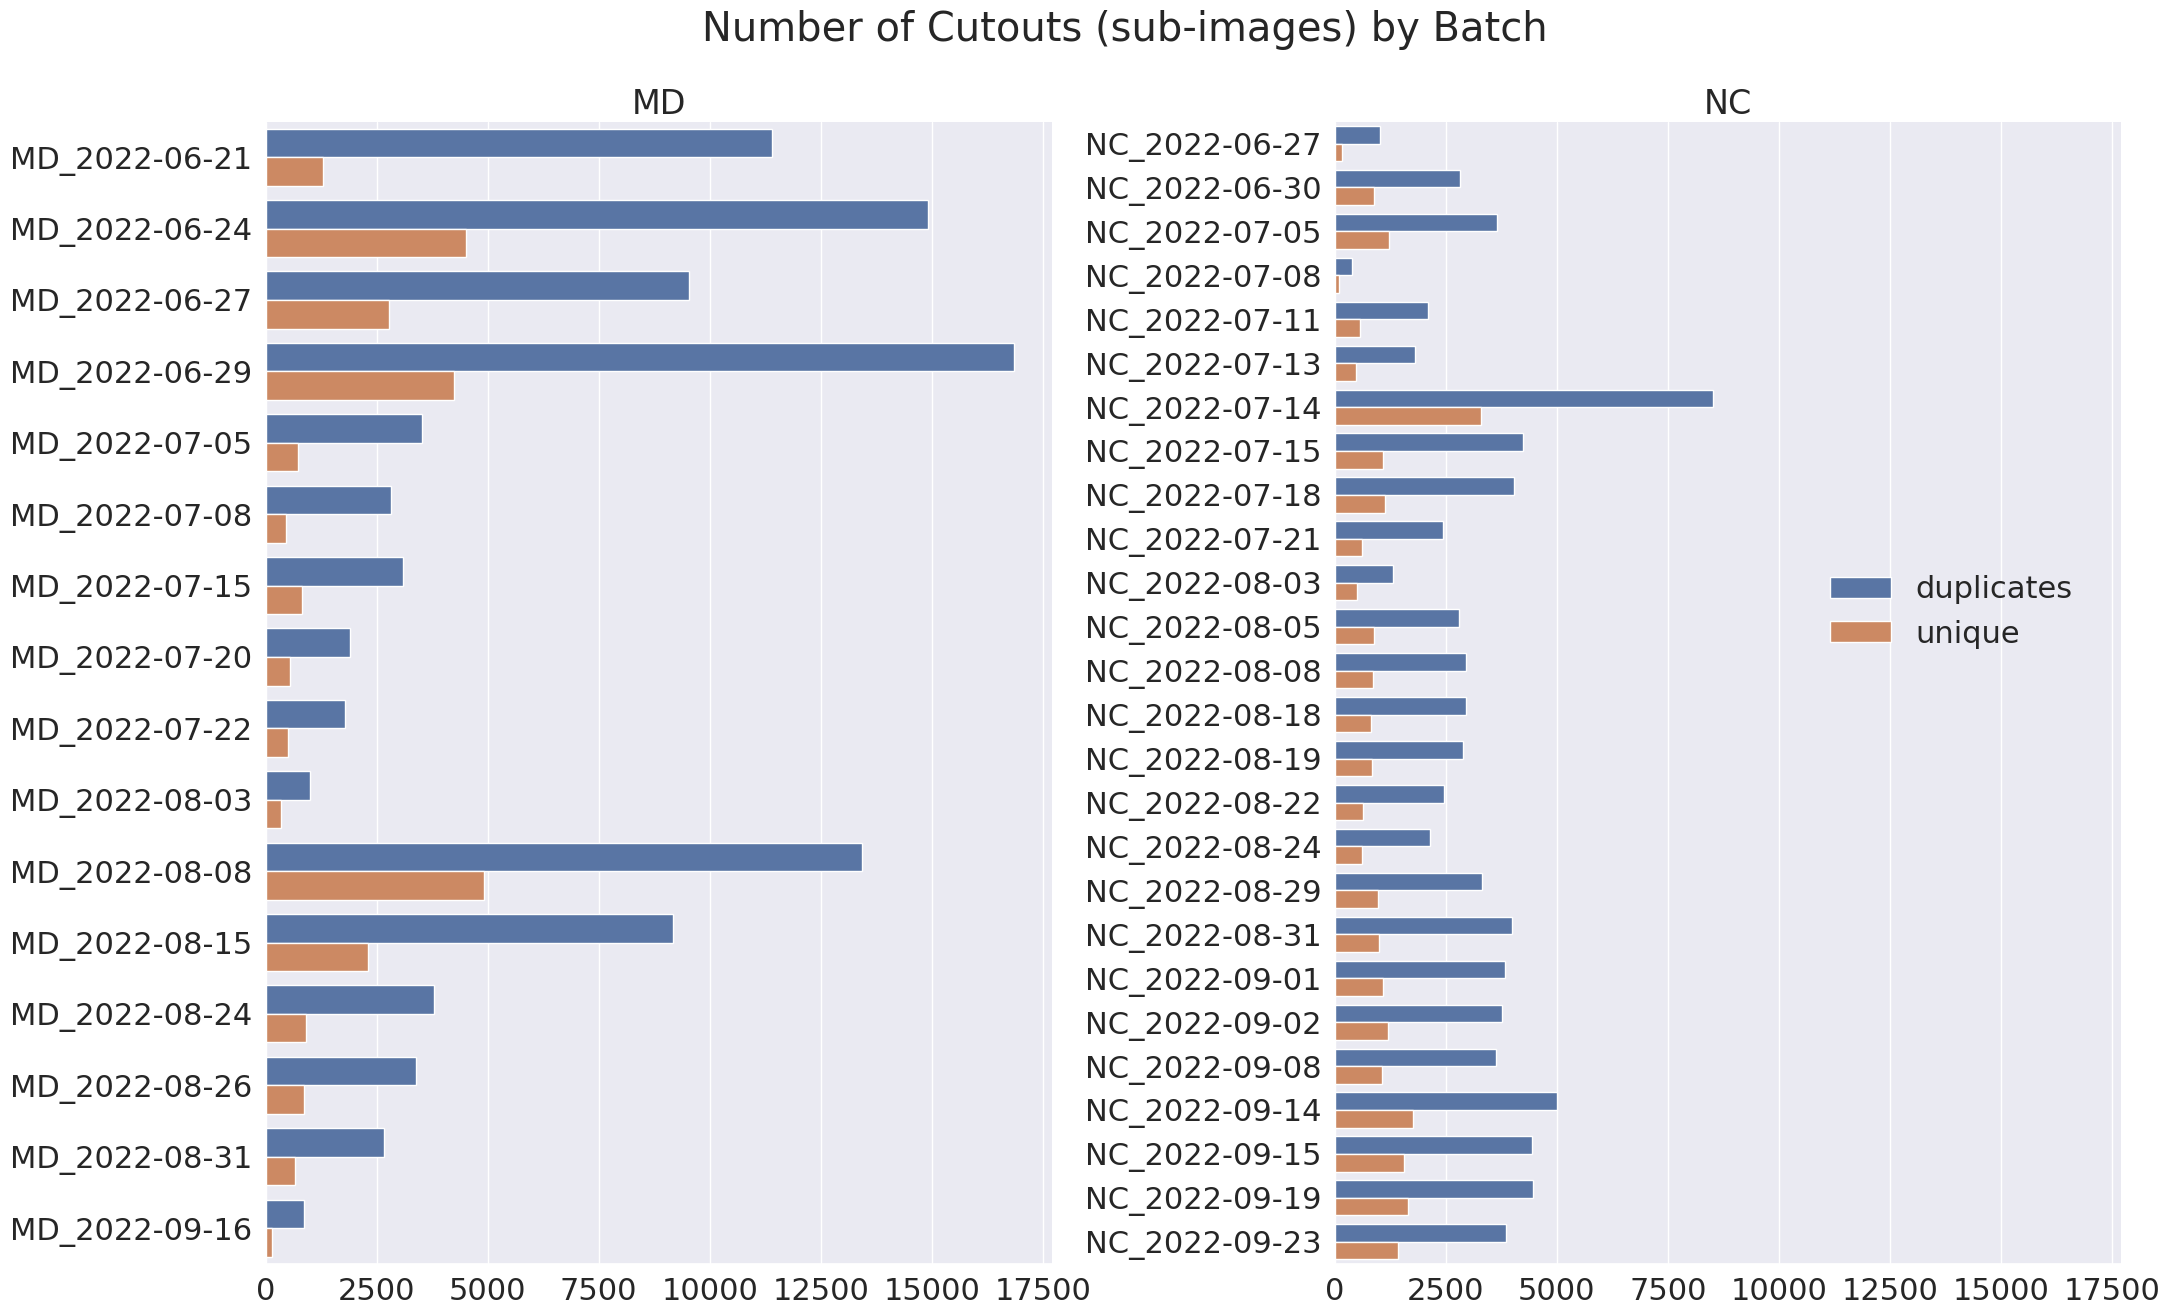

In [75]:
c = df.groupby(["batch_id", "state_id","is_primary"]).cutout_id.count().reset_index().sort_values("batch_id")
sns.set(font_scale=2)

g = sns.catplot(
    data=c,
    x="cutout_id",
    y="batch_id",
    hue="is_primary", 
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    aspect=.8,
    height=14
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g._legend.set_title("")
# replace labels
new_labels = ['duplicates', 'unique']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(g, "center right", bbox_to_anchor=(.9, .55), frameon=False)

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Cutouts (sub-images) by Batch')
# g.savefig("../assets/Cutouts_by_batch_summer_weeds_2022.png", dpi=300)


Text(0.5, 0.98, 'Number of Cutouts (sub-images) by Species')

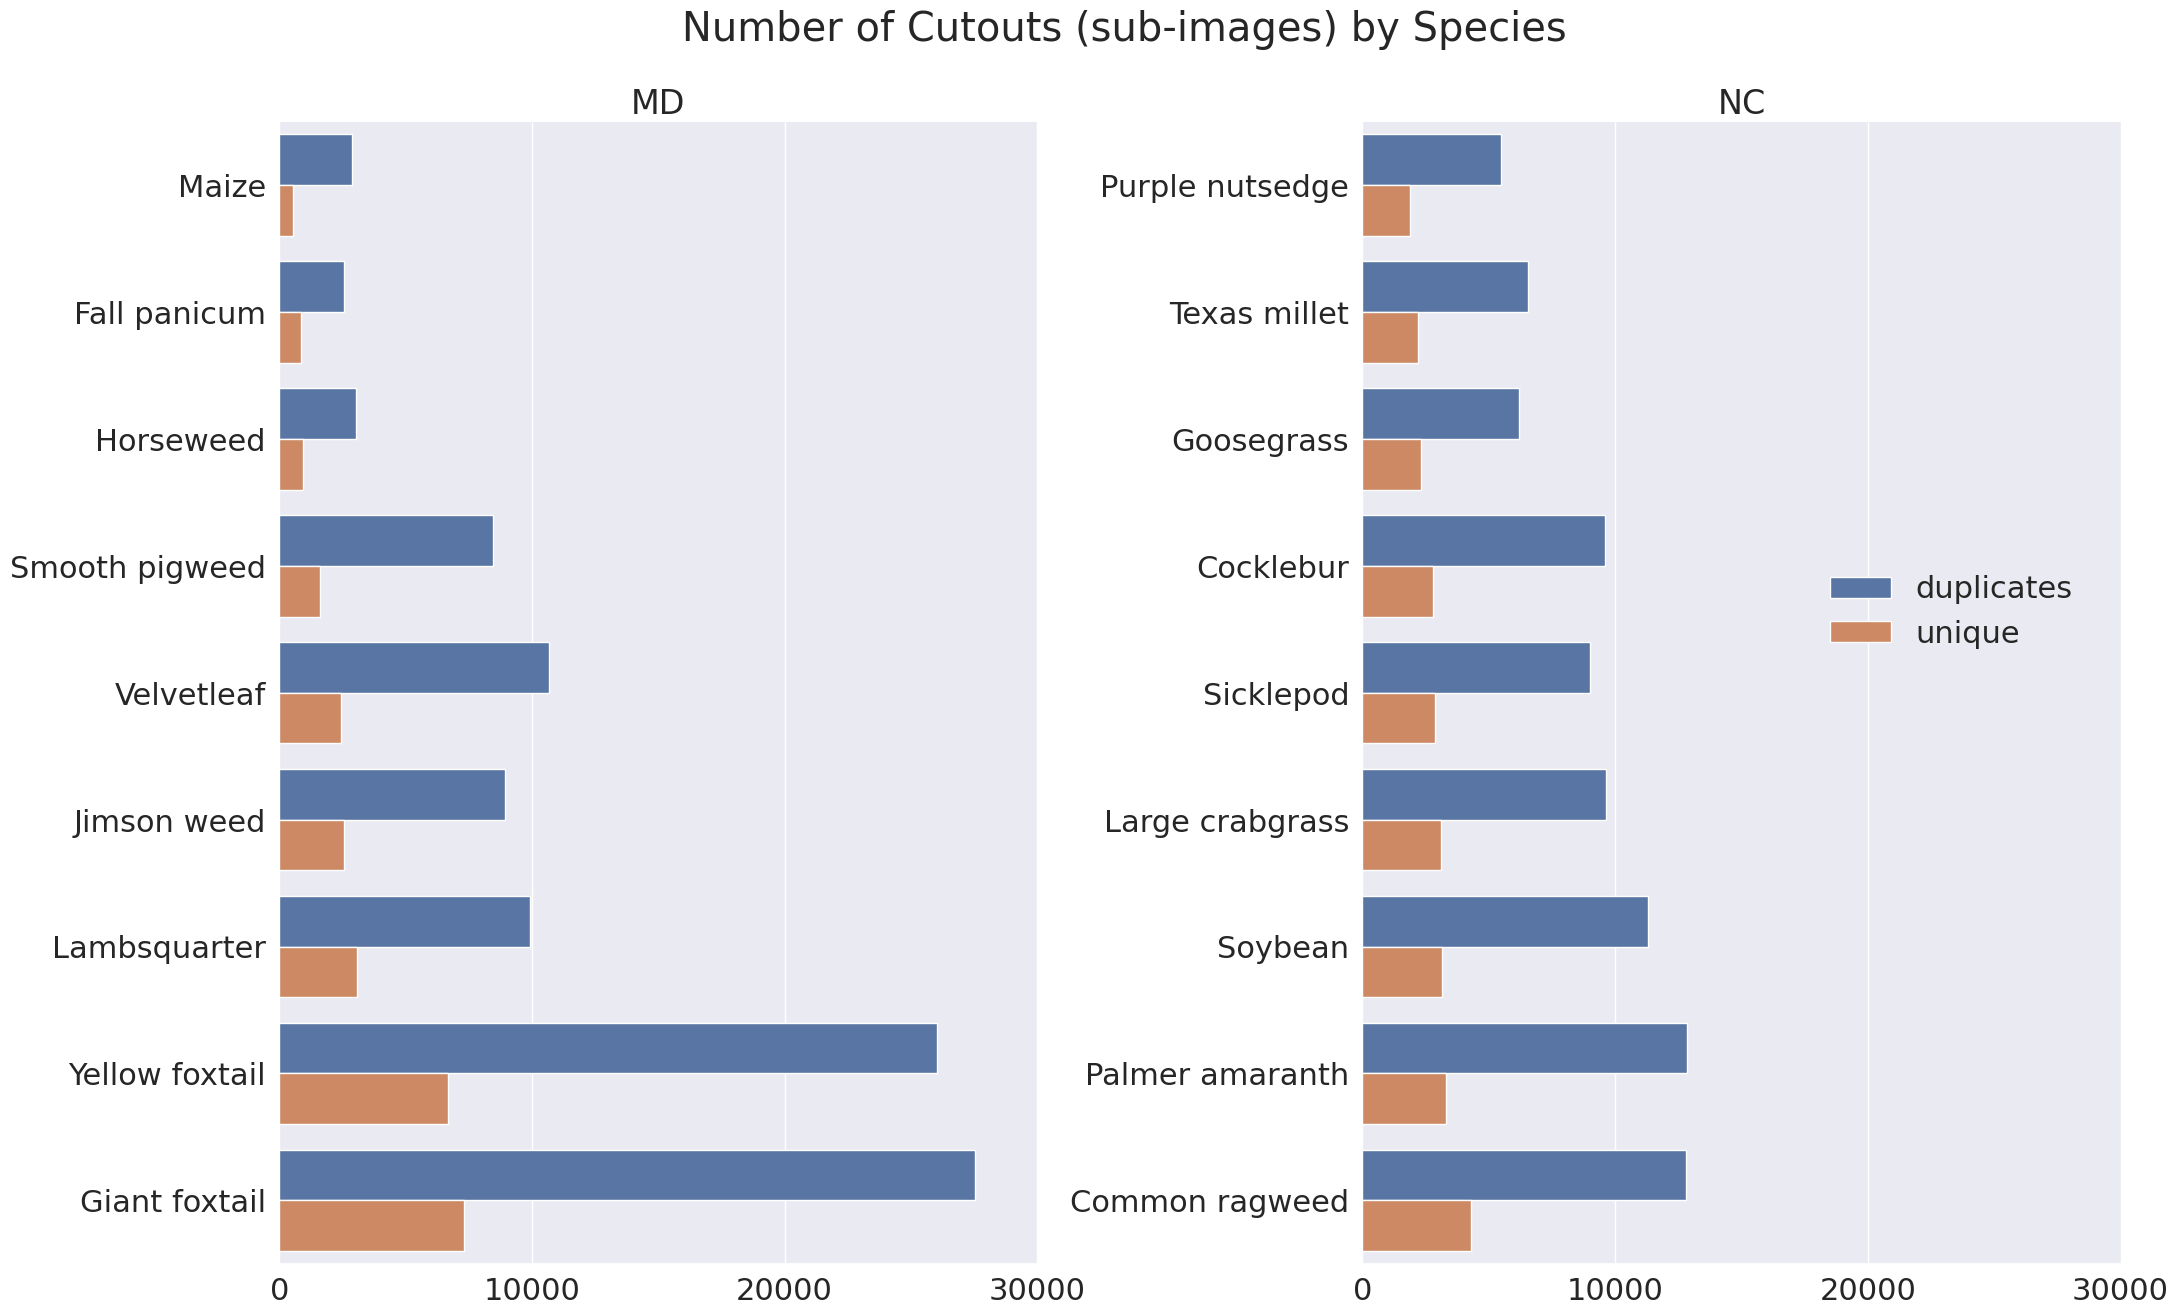

In [87]:
c = df.groupby(["common_name", "state_id", "is_primary"]).cutout_id.count().reset_index().sort_values("cutout_id")
c = c[c["common_name"]!="colorchecker"]

sns.set(font_scale=2)

g = sns.catplot(
    data=c,
    x="cutout_id",
    y="common_name",
    hue="is_primary",
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    aspect=.8,
    height=14
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g._legend.set_title("")
# replace labels
new_labels = ['duplicates', 'unique']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(g, "center right", bbox_to_anchor=(.9, .55), frameon=False)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)


g.set(xticks=np.arange(0,36000,10000))
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Cutouts (sub-images) by Species')
# g.savefig("../assets/Cutouts_by_species_summer_weeds_2022.png", dpi=300)
